In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [10]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/Figure/Figure4/"

In [3]:
#load the heatmap matrix
heatmap_matrix = pd.read_csv(readdata_dir + "FeaturePredictFitness/FeaturePredictFitness.txt", sep = "\t")
heatmap_matrix

,VENT840101,WERD780103,QIAN880102,FAUJ880107,MIYS990102,FASG760104,CHAM830108,KRIW790103,QIAN880120,GRAR740102,...,ZHOH040103,FASG760103,LEVM760107,ROBB760107,RICJ880116,LEVM780103,mutated_N,mutation_site,%loop,segment
0,0.0000,-0.4691,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,...,0.0000,-0.2114,-0.5464,0.0000,0.0000,-0.2885,5,"[110, 111, 112, 114, 115]",100.0,1
1,0.0000,-0.4914,0.0000,0.1910,0.1848,-0.1669,0.0000,0.0000,0.0000,0.0,...,0.0000,-0.2650,-0.4072,-0.1518,-0.4372,-0.3460,6,"[108, 110, 111, 112, 114, 135]",100.0,1
2,0.0000,-0.3629,0.0000,0.0000,0.0000,0.0000,-0.3014,-0.2492,0.0000,0.0,...,0.0000,-0.2672,-0.4327,0.0000,-0.3835,0.0000,5,"[110, 111, 114, 115, 135]",100.0,1
3,0.0000,-0.6654,0.0000,0.0000,0.0000,-0.2857,-0.3448,0.0000,0.0000,0.0,...,0.0000,-0.2966,-0.7432,0.0000,-0.6474,0.0000,5,"[110, 111, 112, 115, 135]",100.0,1
4,0.0000,-0.5458,0.0000,0.0000,0.0000,0.0000,-0.2567,-0.1990,0.0000,0.0,...,0.0000,-0.2028,-0.5718,0.0000,-0.5314,-0.2787,6,"[110, 111, 112, 114, 115, 135]",100.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.3175,0.0000,0.4068,0.0000,0.0000,0.7049,0.0000,0.7732,0.5262,0.0,...,0.3184,-0.3171,0.4161,-0.5308,-0.3937,0.0000,9,"[96, 97, 98, 99, 102, 105, 119, 121, 122]",0.0,6
773,0.0000,0.0000,0.0000,-0.3754,0.2116,-0.6405,-0.5064,0.6435,0.2476,0.0,...,0.2097,-0.3361,0.0000,0.0000,0.4695,0.7731,8,"[96, 97, 98, 99, 102, 105, 119, 120]",0.0,6
774,0.0000,0.0000,0.0000,-0.5476,0.0000,-0.6762,-0.5665,0.5772,0.4243,0.0,...,0.0000,-0.3886,0.0000,-0.6571,-0.5116,0.7613,9,"[96, 97, 98, 99, 102, 105, 119, 120, 121]",0.0,6
775,0.3053,0.0000,0.0000,-0.2572,0.2645,0.6354,0.2324,0.7194,0.6610,0.0,...,0.3785,-0.3174,0.2667,-0.5664,0.0000,0.7402,10,"[96, 97, 98, 99, 102, 105, 119, 120, 121, 122]",0.0,6


In [4]:
#give a function 
def calCorr05(x,data):
    count = 0 
    for single_value in x:
        if single_value < -0.5:
            count += 1
    return 100*count/data.shape[0]

#of rows in loop data is 428, #of rows in nonloop data is 349


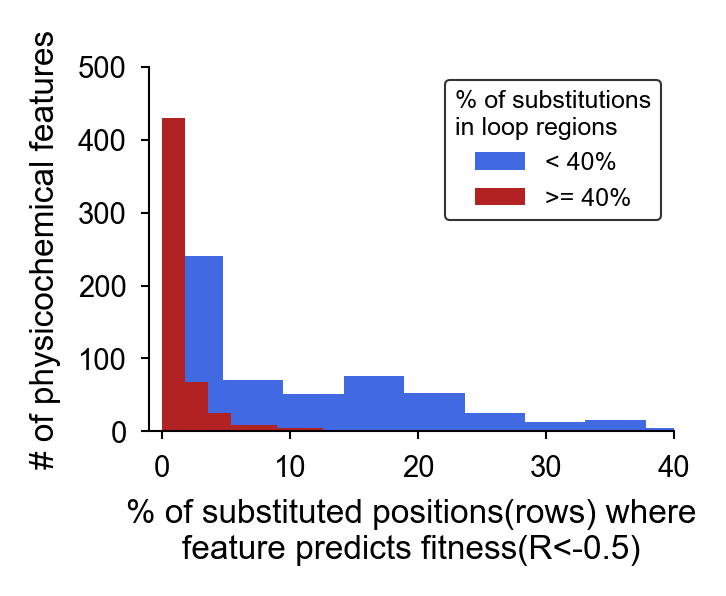

In [7]:
#In which part, features can predict more regions?

plt.rcParams['figure.dpi'] = 300 #set the dpi of the data 
all_dis_data = heatmap_matrix
all_dis_data_dis = all_dis_data[all_dis_data["%loop"]>40]
all_dis_small_corr_07_dis = {}
for feature in all_dis_data_dis.columns[:-5]:
    all_dis_small_corr_07_dis[feature] = calCorr05(all_dis_data_dis[feature].values,all_dis_data_dis)
    

    
all_dis_data_or = all_dis_data[all_dis_data["%loop"]<=40]
all_dis_small_corr_07_or = {}
for feature in all_dis_data_or.columns[:-5]:
    all_dis_small_corr_07_or[feature] = calCorr05(all_dis_data_or[feature].values,all_dis_data_or)
    
print("#of rows in loop data is %d, #of rows in nonloop data is %d"%(all_dis_data_dis.shape[0],
                                                                    all_dis_data_or.shape[0]))    
plt.figure(figsize=(2.5,2))
ax = plt.subplot(111)
ax.hist(list(all_dis_small_corr_07_or.values()),color="royalblue",label = "< 40%")
ax.hist(list(all_dis_small_corr_07_dis.values()),color="firebrick",label = ">= 40%")
#plt.axvline(9.91,color="royalblue",ls="--")
#plt.axvline(1.42,color="firebrick",ls="--")
l =  plt.legend(loc='upper right', scatterpoints=1,edgecolor='black',fontsize=6,
        title_fontsize = 6,title = "% of substitutions\nin loop regions")    
for text in l.get_texts():
    text.set_color("black")
    
l.get_frame().set_linewidth(0.5)

plt.xlabel("% of substituted positions(rows) where\nfeature predicts fitness(R<-0.5)",fontsize=8)
plt.ylabel("# of physicochemical features",fontsize=8)

plt.xticks([0,10,20,30,40],[0,10,20,30,40],fontsize = 7)
plt.yticks([0,100,200,300,400,500],[0,100,200,300,400,500],fontsize = 7)

plt.xlim(-1,40)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
#save the figure
plt.tight_layout()
plt.savefig(savedata_dir + "FeaturesPredictiveInLoopRegions.png", dpi = 300)

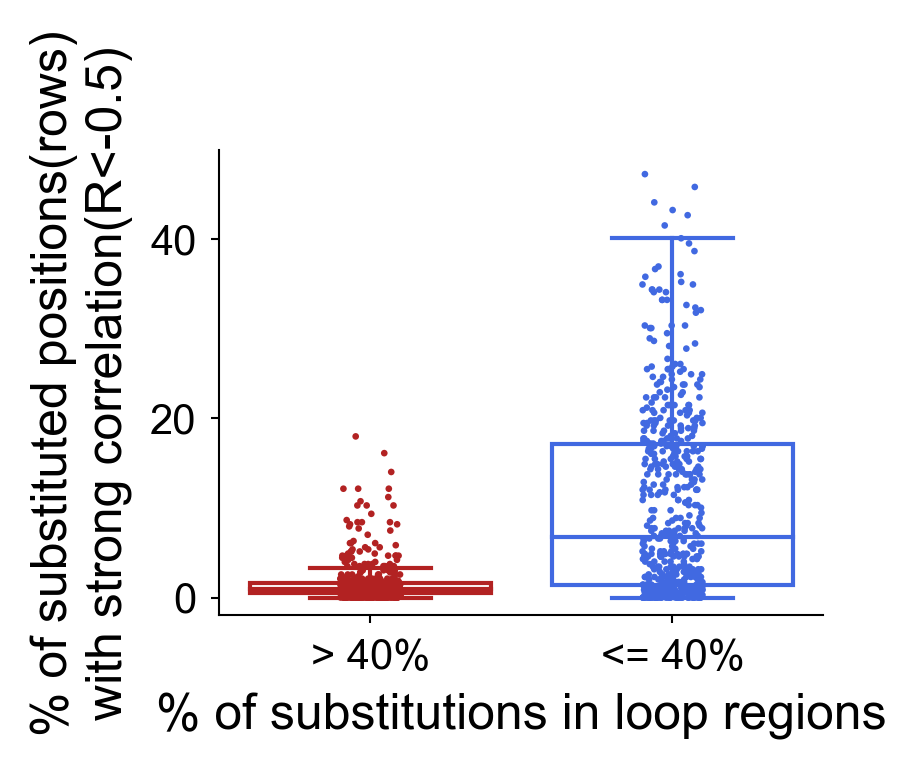

In [8]:
#how each features can predict fitness in loop regions or not?
import seaborn as sns
plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)
mean_list = []
mean_list.extend(list(all_dis_small_corr_07_dis.values()))
mean_list.extend(list(all_dis_small_corr_07_or.values()))

label_list = []
label_list.extend(["> 40%"]*len(list(all_dis_small_corr_07_dis.values())))
label_list.extend(["<= 40%"]*len(list(all_dis_small_corr_07_or.values())))

sns.boxplot(x=label_list,y=mean_list,linewidth=1.0,fliersize=0,color="white" )

color_map = {0:"firebrick",1:"royalblue"}
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = color_map[i]
    artist.set_edgecolor(col)

    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)

sns.stripplot(x=label_list,y=mean_list,size=1.6
              ,jitter=0.1,ax=ax,palette = 
                  ["firebrick","royalblue"])

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("% of substitutions in loop regions",fontsize=12)
plt.ylabel("% of substituted positions(rows)\nwith strong correlation(R<-0.5)",fontsize = 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
       
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
plt.tight_layout()
plt.ylim(-2,50)
#save the figure
plt.savefig(savedata_dir + "HowEachFeaturePredictFitnessInLoopRegions.png",dpi = 300)

In [9]:
#use U test 
stats.mannwhitneyu(list(all_dis_small_corr_07_dis.values()),
                 list(all_dis_small_corr_07_or.values()),alternative = "less" )

MannwhitneyuResult(statistic=65262.5, pvalue=3.5304973551469876e-61)

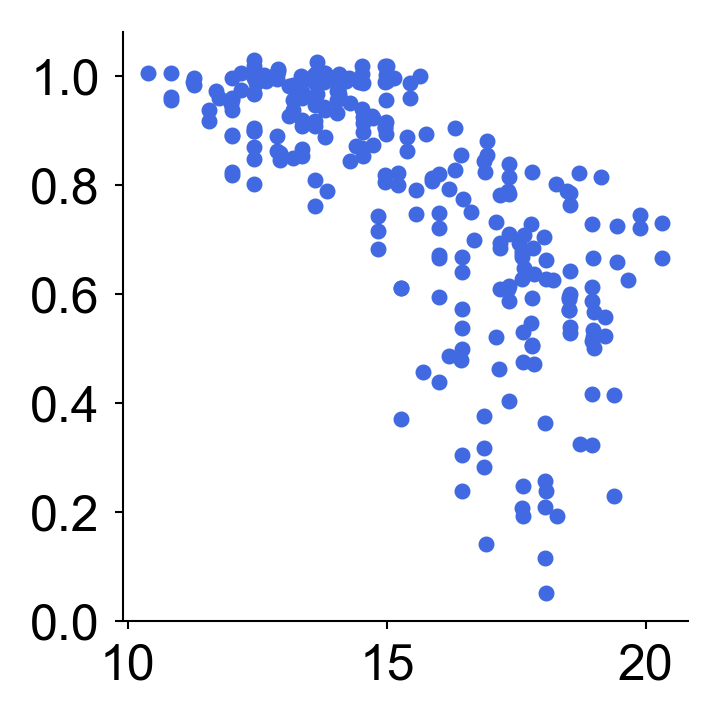

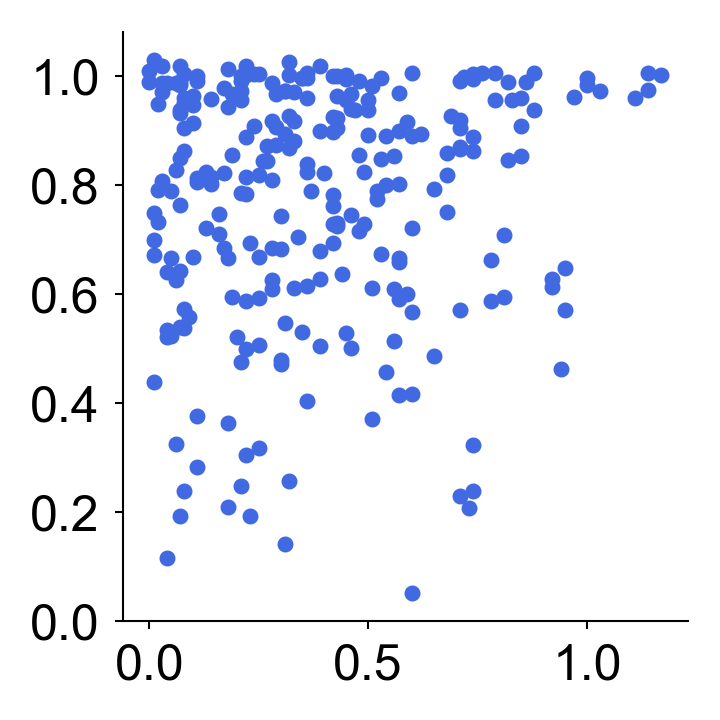

In [49]:
#add four examples scatter plots to show that feature value can predict fitness
#load row data (106,108,110,111,112,131,135) belongs to segment1
#load WT data 
wt_data = pd.read_csv(readdata_dir + "AAindex/wild_553_12.txt",sep ="\t")
seg1feature_data = pd.read_csv(readdata_dir + "FeaturePredictFitness/553features#82_genotype_seg1.txt", sep = "\t")
seg1feature_datafilter = seg1feature_data[seg1feature_data["mutation_list"] == '[106, 108, 110, 111, 112, 131, 135]' ]
seg1featurePredict_list = [abs(i) for i in [seg1feature_datafilter["KARS160109"].values - wt_data.loc[0, "KARS160109"]][0]]
seg1featureUPredict_list = [abs(i) for i in [seg1feature_datafilter["CRAJ730102"].values - wt_data.loc[0, "CRAJ730102"]][0]]
seg1fitness_list = seg1feature_datafilter["fitness"].values
#plot the results
plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)
ax.scatter(seg1featurePredict_list,seg1fitness_list,color = "royalblue",s = 8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
       
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

plt.savefig(savedata_dir + "predictKARS.png",dpi = 300)
plt.show()
plt.close()
#

plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)
ax.scatter(seg1featureUPredict_list,seg1fitness_list,color = "royalblue",s = 8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
       
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
plt.xticks(fontsize =12 )
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig(savedata_dir + "UpredictCARJ.png",dpi = 300)
plt.show()
plt.close()

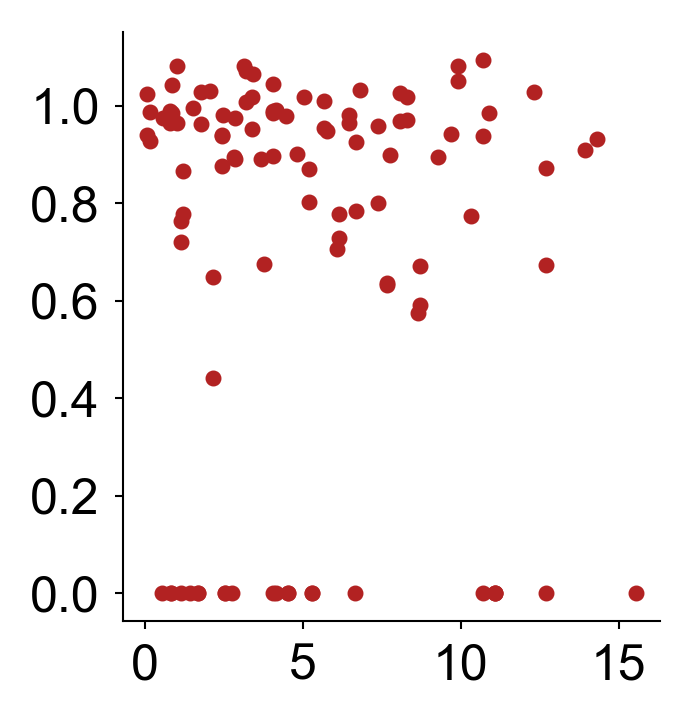

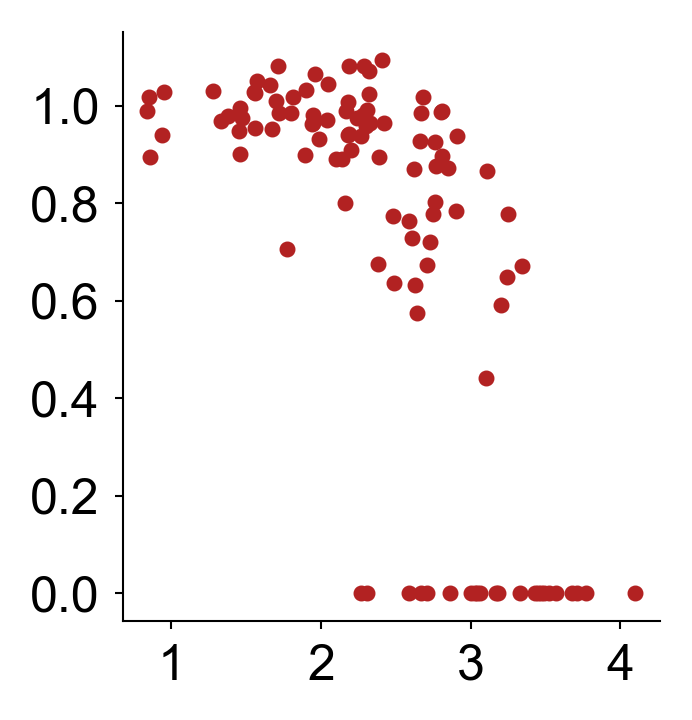

In [7]:
#add four examples scatter plots to show that feature value can predict fitness
#load row data (106,108,110,111,112,131,135) belongs to segment1
#load WT data 
wt_data = pd.read_csv(readdata_dir + "AAindex/wild_553_12.txt",sep ="\t")
seg12feature_data = pd.read_csv(readdata_dir + "FeaturePredictFitness/553features#82_genotype_seg12.txt", sep = "\t")
seg12feature_datafilter = seg12feature_data[seg12feature_data["mutation_list"] == '[7, 8, 9, 11, 19, 20, 21, 22, 23]' ]
seg12featurePredict_list = [abs(i) for i in [seg12feature_datafilter["KARS160109"].values - wt_data.loc[11, "KARS160109"]][0]]
seg12featureUPredict_list = [abs(i) for i in [seg12feature_datafilter["CRAJ730102"].values - wt_data.loc[11, "CRAJ730102"]][0]]
seg12fitness_list = seg12feature_datafilter["fitness"].values
#plot the results
plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)
ax.scatter(seg12featurePredict_list,seg12fitness_list,color = "firebrick",s = 8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
       
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
plt.xticks(fontsize =12 )
plt.yticks(fontsize = 12)
plt.tight_layout()

plt.savefig(savedata_dir + "UpredictKARS.png",dpi = 300)
plt.show()
plt.close()
#

plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)
ax.scatter(seg12featureUPredict_list,seg12fitness_list,color = "firebrick",s = 8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
       
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
plt.xticks(fontsize =12 )
plt.yticks(fontsize = 12)
plt.tight_layout()

plt.savefig(savedata_dir + "predictCARJ.png",dpi = 300)
plt.show()
plt.close()

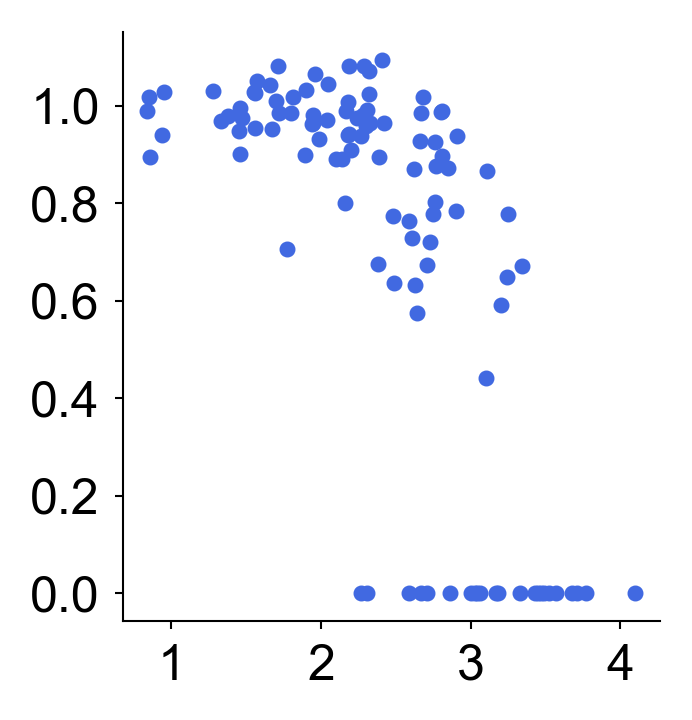

In [11]:
plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)
ax.scatter(seg12featureUPredict_list,seg12fitness_list,color = "royalblue",s = 8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
       
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
plt.xticks(fontsize =12 )
plt.yticks(fontsize = 12)
plt.tight_layout()

plt.savefig(savedata_dir + "predictCARJ_2.png",dpi = 300)
plt.show()
plt.close()